Семинар 3 (неделя 4): Нормальное распределение и проблемы в данных
=====

# Нормальное распределение

In [1]:
# Импорт библиотек для работы со статистикой
import pandas as pd
import numpy as np

# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    #ggplot
%matplotlib inline

In [2]:
# Чтение датасета с помощью pandas
CarsDS = pd.read_csv('mpg.csv', sep=",")

# Демонстрация первых 5 строк таблицы
CarsDS.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Отображаем нужные столбцы разными способами:

Переводим единицы измерений в понятные величины:

In [3]:
# mpg --> liters per 100 km
mile = 1.609 #km
gallon = 3.785 #l
inch = 2.54 #cm
lbs = 0.4536 #kg

CarsDS['lpk'] = mile * gallon * 100 / CarsDS['mpg']
CarsDS['env'] = CarsDS['displacement'] * inch**3 / 1000
CarsDS['mass'] = CarsDS['weight'] * lbs / 1000 

### Одномерное нормальное распределение

In [4]:
def pdf_gaussian(sigma, mean, x):
  Z = np.sqrt(2.0*np.pi*sigma**2) # нормализующая константа
  pdf_z = np.exp(-((x - mean)**2/(2.0*sigma**2)))/Z # 
  return pdf_z

x, dx = np.linspace(-3 ,3,300, retstep = True)

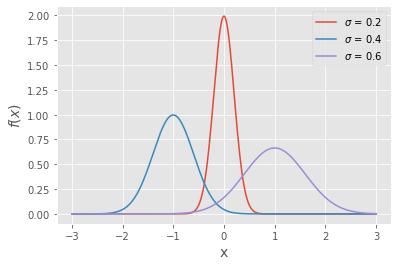

In [5]:
pdf_1 = pdf_gaussian(0.2, 0.0, x)
pdf_2 = pdf_gaussian(0.4, -1.0, x)
pdf_3 = pdf_gaussian(0.6, 1.0, x)
plt.plot(x, pdf_1, label = '$\sigma$ = 0.2')
plt.plot(x, pdf_2,label = '$\sigma$ = 0.4')
plt.plot(x, pdf_3,label = '$\sigma$ = 0.6')
plt.xlabel("x",fontsize = 14)
plt.ylabel("$f(x)$",fontsize = 14)
plt.legend()

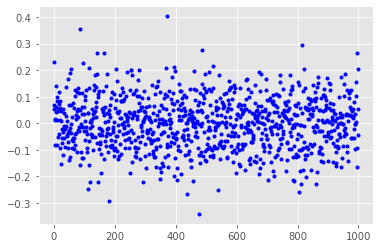

In [6]:
mu, sigma = 0, 0.1 # матожидание и стандартное отклонение
s = np.random.normal(mu, sigma, 1000)
plt.plot(s, 'b.');

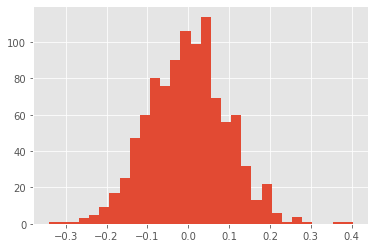

In [7]:
plt.hist(s, 30);

### Двумерное нормальное распределение

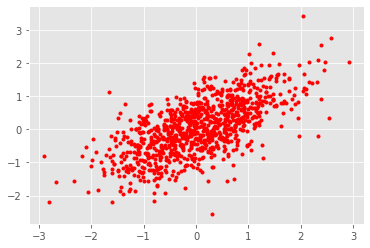

In [8]:
data = np.random.multivariate_normal([0, 0], [[0.8, 0.5], [0.5, 0.7]], 1000)
x = data[:, 0]
y = data[:, 1]
plt.plot(x, y, 'r.');

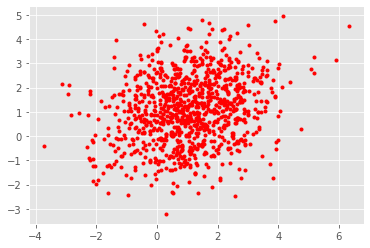

In [9]:
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]

mean2 = [1, 1]
cov2 = [[1, 0], [0, 1]]

data2 = np.random.multivariate_normal(mean1, cov1, 1000) +  np.random.multivariate_normal(mean2, cov2, 1000)
plt.plot(data2[:, 0], data2[:, 1], 'r.');

### Ядерная оценка плотности

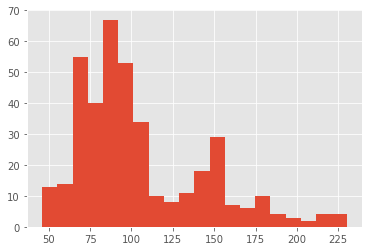

In [10]:
CarsDS['horsepower'].hist(bins=20);

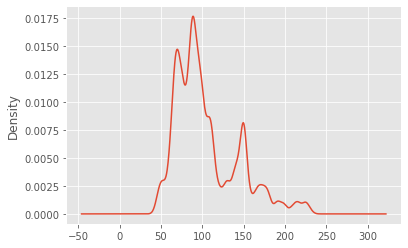

In [11]:
CarsDS['horsepower'].plot.kde( bw_method = 0.1 );

Kernel Density Estimation in Python
https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

(array([[ 0.,  0.,  0.,  1.,  1.,  0.,  3.,  0.,  0.,  0.],
        [ 0.,  3.,  6.,  4.,  3.,  2.,  2.,  0.,  0.,  0.],
        [ 1.,  3., 10., 18., 11., 16., 11.,  4.,  1.,  0.],
        [ 0.,  3., 15., 24., 43., 35., 29., 23.,  6.,  4.],
        [ 1.,  5., 33., 41., 61., 61., 52., 26.,  8.,  2.],
        [ 0.,  5.,  7., 28., 48., 60., 43., 33.,  9.,  6.],
        [ 1.,  1.,  3., 22., 21., 35., 34., 17.,  5.,  2.],
        [ 0.,  1.,  2.,  3.,  3., 11., 10.,  9.,  0.,  2.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  3.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]]),
 array([-3.72176612, -2.71776702, -1.71376792, -0.70976883,  0.29423027,
         1.29822937,  2.30222846,  3.30622756,  4.31022666,  5.31422575,
         6.31822485]),
 array([-3.20854835, -2.39318474, -1.57782114, -0.76245753,  0.05290607,
         0.86826968,  1.68363329,  2.49899689,  3.3143605 ,  4.12972411,
         4.94508771]),
 <matplotlib.collections.QuadMesh at 0x1c51adf16a0>)

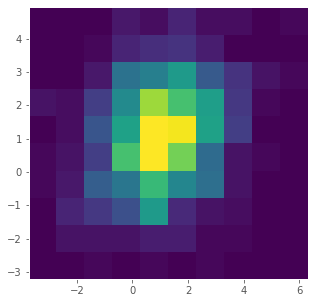

In [12]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist2d(data2[:, 0], data2[:, 1], bins = 10, cmap = 'viridis')

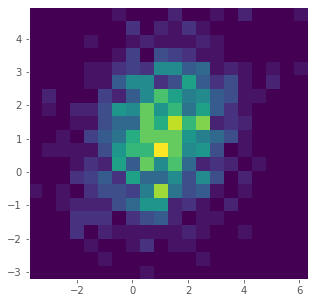

In [13]:
plt.hist2d(data2[:, 0], data2[:, 1], bins = 20, cmap = 'viridis');

In [14]:
xmin = data2[:, 0].min()
xmax = data2[:, 0].max()
ymin = data2[:, 1].min()
ymax = data2[:, 1].max()
xmin, xmax, ymin, ymax

(-3.7217661187083078, 6.318224851757565, -3.20854835105545, 4.945087712325966)

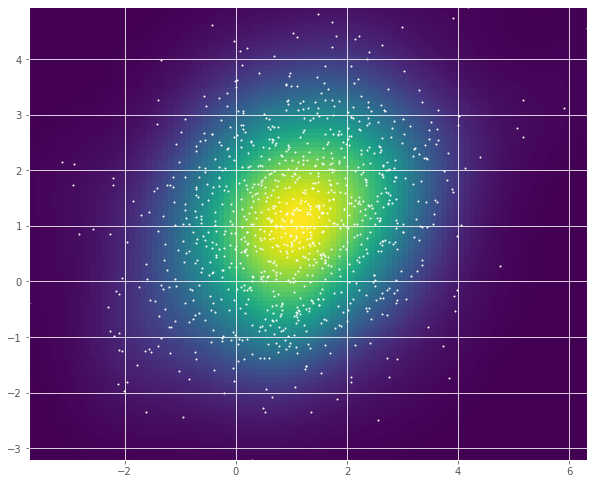

In [15]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([data2[:, 0], data2[:, 1]])

import scipy.stats as stats
kernel = stats.gaussian_kde(values, bw_method = 0.5)

Z = np.reshape(kernel(positions).T, Y.shape)

plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap = 'viridis', extent = [xmin, xmax, ymin, ymax])
ax.plot(data2[:, 0], data2[:, 1], 'w.', markersize = 2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()


### Преобразование Бокса-Кокса

Lambda value used for Transformation: 0.293142153484522


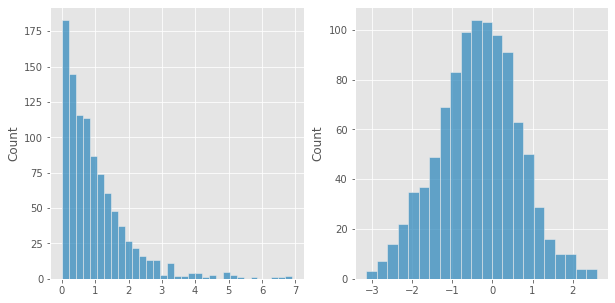

In [16]:
original_data = np.random.exponential(size = 1000)
# original_data = np.random.lognormal(mean=0.0, sigma=1.0, size = 1000)
# original_data = np.random.weibull(100, 1000)


fitted_data, fitted_lambda = stats.boxcox(original_data)
  
fig, ax=plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0])
sns.histplot(fitted_data, ax=ax[1])
fig.set_figheight(5)
fig.set_figwidth(10)
print(f"Lambda value used for Transformation: {fitted_lambda}")

# 3. Проблемы в данных

### Масштабирование и категориальные переменные

In [17]:
CarsDS.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lpk,env,mass
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,33.833694,5.030829,1.589414
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,40.600433,5.735472,1.675145
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,33.833694,5.211086,1.558570
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,38.062906,4.981667,1.557209
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,35.823912,4.948893,1.564466


In [18]:
ScaledCars = CarsDS.loc[:, ['name', 'acceleration', 'lpk', 'mass']]
ScaledCars.head()

,name,acceleration,lpk,mass
0,chevrolet chevelle malibu,12.0,33.833694,1.589414
1,buick skylark 320,11.5,40.600433,1.675145
2,plymouth satellite,11.0,33.833694,1.558570
3,amc rebel sst,12.0,38.062906,1.557209
4,ford torino,10.5,35.823912,1.564466


In [19]:
A_min = ScaledCars['acceleration'].min()
A_max = ScaledCars['acceleration'].max()

A_min, A_max

(8.0, 24.8)

In [20]:
ScaledCars['A_s'] = ( ScaledCars['acceleration'] - A_min ) / ( A_max - A_min )

In [21]:
ScaledCars.head()

,name,acceleration,lpk,mass,A_s
0,chevrolet chevelle malibu,12.0,33.833694,1.589414,0.238095
1,buick skylark 320,11.5,40.600433,1.675145,0.208333
2,plymouth satellite,11.0,33.833694,1.558570,0.178571
3,amc rebel sst,12.0,38.062906,1.557209,0.238095
4,ford torino,10.5,35.823912,1.564466,0.148810


In [22]:
L_min = ScaledCars['lpk'].min()
L_max = ScaledCars['lpk'].max()
ScaledCars['L_s'] = ( ScaledCars['lpk'] - L_min ) / ( L_max - L_min )

M_min = ScaledCars['mass'].min()
M_max = ScaledCars['mass'].max()
ScaledCars['M_s'] = ( ScaledCars['mass'] - M_min ) / ( M_max - M_min )

In [23]:
ScaledCars.head()

,name,acceleration,lpk,mass,A_s,L_s,M_s
0,chevrolet chevelle malibu,12.0,33.833694,1.589414,0.238095,0.380319,0.536150
1,buick skylark 320,11.5,40.600433,1.675145,0.208333,0.504255,0.589736
2,plymouth satellite,11.0,33.833694,1.558570,0.178571,0.380319,0.516870
3,amc rebel sst,12.0,38.062906,1.557209,0.238095,0.457779,0.516019
4,ford torino,10.5,35.823912,1.564466,0.148810,0.416771,0.520556


In [24]:
ScaledCars['Distance'] = np.power( ScaledCars['A_s']**2 
                                  + ScaledCars['L_s']**2 
                                  + ScaledCars['M_s']**2
                                  , 0.5)

ScaledCars.head()

,name,acceleration,lpk,mass,A_s,L_s,M_s,Distance
0,chevrolet chevelle malibu,12.0,33.833694,1.589414,0.238095,0.380319,0.536150,0.699134
1,buick skylark 320,11.5,40.600433,1.675145,0.208333,0.504255,0.589736,0.803408
2,plymouth satellite,11.0,33.833694,1.558570,0.178571,0.380319,0.516870,0.666097
3,amc rebel sst,12.0,38.062906,1.557209,0.238095,0.457779,0.516019,0.729745
4,ford torino,10.5,35.823912,1.564466,0.148810,0.416771,0.520556,0.683243


In [25]:
ScaledCars.sort_values( 'Distance', ascending = True )

,name,acceleration,lpk,mass,A_s,L_s,M_s,Distance
203,volkswagen rabbit,12.2,20.644288,0.827820,0.250000,0.138749,0.060108,0.292171
395,dodge rampage,11.6,19.031453,1.041012,0.214286,0.109209,0.193365,0.308602
329,honda civic 1500 gl,13.8,13.654854,0.839160,0.345238,0.010734,0.067196,0.351880
301,plymouth horizon,13.2,17.807208,0.997920,0.309524,0.086786,0.166430,0.361989
306,chevrolet citation,11.3,21.146059,1.177092,0.196429,0.147939,0.278424,0.371470
...,...,...,...,...,...,...,...,...
44,pontiac safari (sw),12.0,46.846654,2.331504,0.238095,0.618658,1.000000,1.199761
26,chevy c20,15.0,60.900650,1.984954,0.416667,0.876064,0.783385,1.246913
25,ford f250,14.0,60.900650,2.093364,0.357143,0.876064,0.851148,1.272593
103,chevrolet impala,14.0,55.364227,2.266639,0.357143,0.774662,0.959456,1.283825


In [26]:
ScaledCars[ScaledCars['name'] == 'chevrolet impala']

,name,acceleration,lpk,mass,A_s,L_s,M_s,Distance
6,chevrolet impala,9.0,43.500464,1.974974,0.059524,0.557371,0.777148,0.958209
38,chevrolet impala,12.0,43.500464,1.909202,0.238095,0.557371,0.736036,0.953468
62,chevrolet impala,12.0,46.846654,1.938686,0.238095,0.618658,0.754466,1.004313
103,chevrolet impala,14.0,55.364227,2.266639,0.357143,0.774662,0.959456,1.283825


### Пропуски и выбросы

замена нулями

In [27]:
# импорт пакетов
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

# чтение данных
df = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)

# shape and data types of the data
print(df.shape)
print(df.dtypes)

(2930, 82)
Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object


In [28]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Order' 'PID' 'MS SubClass' 'Lot Frontage' 'Lot Area' 'Overall Qual'
 'Overall Cond' 'Year Built' 'Year Remod/Add' 'Mas Vnr Area'
 'BsmtFin SF 1' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' '1st Flr SF'
 '2nd Flr SF' 'Low Qual Fin SF' 'Gr Liv Area' 'Bsmt Full Bath'
 'Bsmt Half Bath' 'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr'
 'TotRms AbvGrd' 'Fireplaces' 'Garage Yr Blt' 'Garage Cars' 'Garage Area'
 'Wood Deck SF' 'Open Porch SF' 'Enclosed Porch' '3Ssn Porch'
 'Screen Porch' 'Pool Area' 'Misc Val' 'Mo Sold' 'Yr Sold' 'SalePrice']


In [29]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MS Zoning' 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities'
 'Lot Config' 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2'
 'Bldg Type' 'House Style' 'Roof Style' 'Roof Matl' 'Exterior 1st'
 'Exterior 2nd' 'Mas Vnr Type' 'Exter Qual' 'Exter Cond' 'Foundation'
 'Bsmt Qual' 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin Type 2'
 'Heating' 'Heating QC' 'Central Air' 'Electrical' 'Kitchen Qual'
 'Functional' 'Fireplace Qu' 'Garage Type' 'Garage Finish' 'Garage Qual'
 'Garage Cond' 'Paved Drive' 'Pool QC' 'Fence' 'Misc Feature' 'Sale Type'
 'Sale Condition']


<AxesSubplot:>

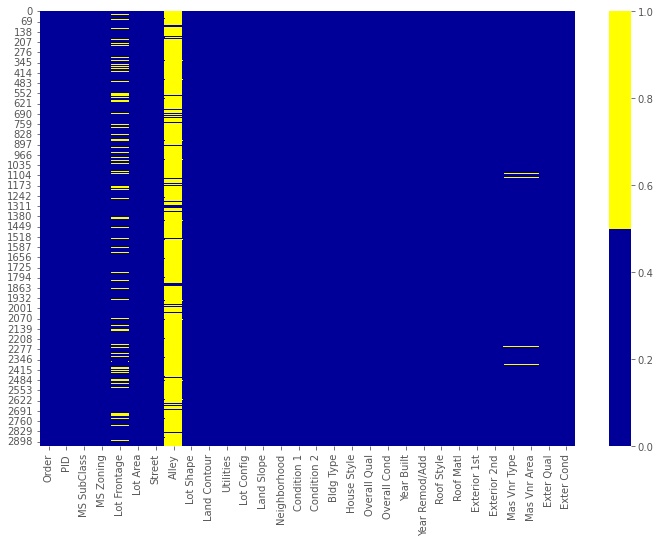

In [30]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [31]:
np.mean(df['Alley'].isnull())

0.9324232081911262

In [32]:
# Процентный список пропущенных данных
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Order - 0%
PID - 0%
MS SubClass - 0%
MS Zoning - 0%
Lot Frontage - 17%
Lot Area - 0%
Street - 0%
Alley - 93%
Lot Shape - 0%
Land Contour - 0%
Utilities - 0%
Lot Config - 0%
Land Slope - 0%
Neighborhood - 0%
Condition 1 - 0%
Condition 2 - 0%
Bldg Type - 0%
House Style - 0%
Overall Qual - 0%
Overall Cond - 0%
Year Built - 0%
Year Remod/Add - 0%
Roof Style - 0%
Roof Matl - 0%
Exterior 1st - 0%
Exterior 2nd - 0%
Mas Vnr Type - 1%
Mas Vnr Area - 1%
Exter Qual - 0%
Exter Cond - 0%
Foundation - 0%
Bsmt Qual - 3%
Bsmt Cond - 3%
Bsmt Exposure - 3%
BsmtFin Type 1 - 3%
BsmtFin SF 1 - 0%
BsmtFin Type 2 - 3%
BsmtFin SF 2 - 0%
Bsmt Unf SF - 0%
Total Bsmt SF - 0%
Heating - 0%
Heating QC - 0%
Central Air - 0%
Electrical - 0%
1st Flr SF - 0%
2nd Flr SF - 0%
Low Qual Fin SF - 0%
Gr Liv Area - 0%
Bsmt Full Bath - 0%
Bsmt Half Bath - 0%
Full Bath - 0%
Half Bath - 0%
Bedroom AbvGr - 0%
Kitchen AbvGr - 0%
Kitchen Qual - 0%
TotRms AbvGrd - 0%
Functional - 0%
Fireplaces - 0%
Fireplace Qu - 49%
Garage Type - 5

created missing indicator for: Lot Frontage
created missing indicator for: Alley
created missing indicator for: Mas Vnr Type
created missing indicator for: Mas Vnr Area
created missing indicator for: Bsmt Qual
created missing indicator for: Bsmt Cond
created missing indicator for: Bsmt Exposure
created missing indicator for: BsmtFin Type 1
created missing indicator for: BsmtFin SF 1
created missing indicator for: BsmtFin Type 2
created missing indicator for: BsmtFin SF 2
created missing indicator for: Bsmt Unf SF
created missing indicator for: Total Bsmt SF
created missing indicator for: Electrical
created missing indicator for: Bsmt Full Bath
created missing indicator for: Bsmt Half Bath
created missing indicator for: Fireplace Qu
created missing indicator for: Garage Type
created missing indicator for: Garage Yr Blt
created missing indicator for: Garage Finish
created missing indicator for: Garage Cars
created missing indicator for: Garage Area
created missing indicator for: Garage Q

<AxesSubplot:xlabel='index'>

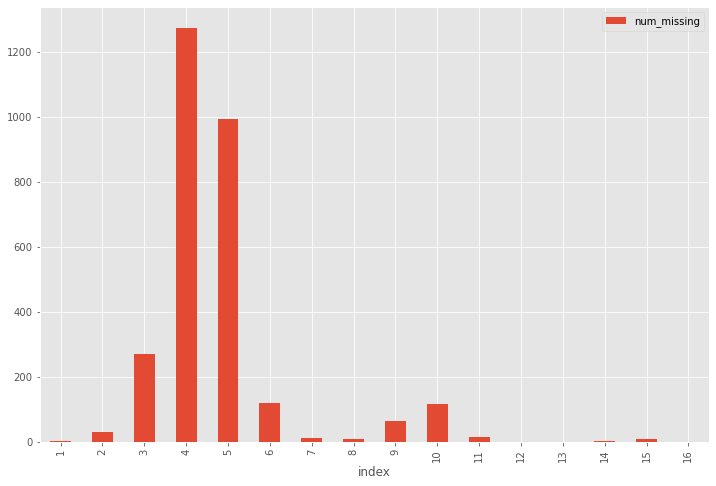

In [33]:
# Кол-во пропусков в одной строке 

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing) # кол-во пропущенных значений
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1) # кол-во пропущенных значений в строке

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [34]:
df['num_missing']

0       4
1       4
2       4
3       4
4       3
       ..
2925    4
2926    5
2927    8
2928    4
2929    4
Name: num_missing, Length: 2930, dtype: int64

In [35]:
df[df['num_missing'] > 5]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Garage Yr Blt_ismissing,Garage Finish_ismissing,Garage Cars_ismissing,Garage Area_ismissing,Garage Qual_ismissing,Garage Cond_ismissing,Pool QC_ismissing,Fence_ismissing,Misc Feature_ismissing,num_missing
14,15,527182190,120,RL,NaN,6820,Pave,NaN,IR1,Lvl,...,False,False,False,False,False,False,True,True,True,6
22,23,527368020,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,...,False,False,False,False,False,False,True,True,True,6
27,28,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,...,True,True,False,False,True,True,True,True,True,9
55,56,528240070,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,...,False,False,False,False,False,False,True,True,True,7
79,80,531452180,60,RL,NaN,9453,Pave,NaN,IR1,Lvl,...,False,False,False,False,False,False,True,True,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2914,923226180,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,...,True,True,False,False,True,True,True,True,True,10
2916,2917,923228130,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,...,True,True,False,False,True,True,True,True,True,10
2918,2919,923228210,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,...,True,True,False,False,True,True,True,False,True,9
2919,2920,923228260,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,True,True,False,False,True,True,True,True,True,10


In [36]:
# отбрасываем строки с большим количеством пропусков
ind_missing = df[df['num_missing'] > 5].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [37]:
df.shape

(2930, 110)

In [38]:
df_less_missing_rows.shape

(2575, 110)

In [39]:
# Замена медианным значением
med = df['Lot Frontage'].median()
print(med)
df['Lot Frontage'] = df['Lot Frontage'].fillna(med)

68.0


In [40]:
# Замена значений на медианное значение в числовой переменной

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: Mas Vnr Area
imputing missing values for: BsmtFin SF 1
imputing missing values for: BsmtFin SF 2
imputing missing values for: Bsmt Unf SF
imputing missing values for: Total Bsmt SF
imputing missing values for: Bsmt Full Bath
imputing missing values for: Bsmt Half Bath
imputing missing values for: Garage Yr Blt
imputing missing values for: Garage Cars
imputing missing values for: Garage Area


In [41]:
# Замена значений на наиболее частое значение в категориальной переменной

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: Alley
imputing missing values for: Mas Vnr Type
imputing missing values for: Bsmt Qual
imputing missing values for: Bsmt Cond
imputing missing values for: Bsmt Exposure
imputing missing values for: BsmtFin Type 1
imputing missing values for: BsmtFin Type 2
imputing missing values for: Electrical
imputing missing values for: Fireplace Qu
imputing missing values for: Garage Type
imputing missing values for: Garage Finish
imputing missing values for: Garage Qual
imputing missing values for: Garage Cond
imputing missing values for: Pool QC
imputing missing values for: Fence
imputing missing values for: Misc Feature


In [42]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Order - 0%
PID - 0%
MS SubClass - 0%
MS Zoning - 0%
Lot Frontage - 0%
Lot Area - 0%
Street - 0%
Alley - 0%
Lot Shape - 0%
Land Contour - 0%
Utilities - 0%
Lot Config - 0%
Land Slope - 0%
Neighborhood - 0%
Condition 1 - 0%
Condition 2 - 0%
Bldg Type - 0%
House Style - 0%
Overall Qual - 0%
Overall Cond - 0%
Year Built - 0%
Year Remod/Add - 0%
Roof Style - 0%
Roof Matl - 0%
Exterior 1st - 0%
Exterior 2nd - 0%
Mas Vnr Type - 0%
Mas Vnr Area - 0%
Exter Qual - 0%
Exter Cond - 0%
Foundation - 0%
Bsmt Qual - 0%
Bsmt Cond - 0%
Bsmt Exposure - 0%
BsmtFin Type 1 - 0%
BsmtFin SF 1 - 0%
BsmtFin Type 2 - 0%
BsmtFin SF 2 - 0%
Bsmt Unf SF - 0%
Total Bsmt SF - 0%
Heating - 0%
Heating QC - 0%
Central Air - 0%
Electrical - 0%
1st Flr SF - 0%
2nd Flr SF - 0%
Low Qual Fin SF - 0%
Gr Liv Area - 0%
Bsmt Full Bath - 0%
Bsmt Half Bath - 0%
Full Bath - 0%
Half Bath - 0%
Bedroom AbvGr - 0%
Kitchen AbvGr - 0%
Kitchen Qual - 0%
TotRms AbvGrd - 0%
Functional - 0%
Fireplaces - 0%
Fireplace Qu - 0%
Garage Type - 0%
G

### Сегментация

https://github.com/FUlyankin/matstat_coursera/blob/main/week02_descreptive_statistics/10_python_segmentation.ipynb